# DATA QUALITY

In [99]:
import numpy as np
import pandas as pd
from janitor import clean_names
import seaborn as sns
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True
pd.options.display.float_format = '{:,.2f}'.format

## UPLOAD DATASET

In [100]:
path ='../../'

In [101]:
name_data_file = 'work.csv'

In [102]:
full_path = path + '/02_Data/03_Work/' + name_data_file

df = pd.read_csv(full_path,index_col='id_cliente')
df

,Unnamed: 0,empleo,antigüedad_empleo,ingresos,ingresos_verificados,rating,dti,vivienda,num_hipotecas,num_lineas_credito,...,id_prestamo,descripcion,finalidad,principal,tipo_interes,num_cuotas,imp_cuota,imp_amortizado,estado,imp_recuperado
id_cliente,,,,,,,,,,,,,,,,,,,,,
137387967,0,Hvac technician,3 years,"54,000.00",Source Verified,A,19.31,MORTGAGE,2.00,10.00,...,NaN,NaN,debt_consolidation,"15,000.00",7.21,36 months,464.60,"2,669.06",Current,0.00
4798121,1,"Target Promotions and Marketing,Inc",10+ years,"65,000.00",Not Verified,D,25.40,RENT,1.00,15.00,...,NaN,NaN,debt_consolidation,"10,000.00",17.77,36 months,360.38,"6,362.96",Charged Off,0.00
87998444,3,executive director,9 years,"188,000.00",Source Verified,B,11.69,MORTGAGE,3.00,15.00,...,NaN,NaN,credit_card,"27,000.00",8.99,60 months,560.35,"12,443.00",Current,0.00
103448519,7,Web site administrator,10+ years,"99,800.00",Not Verified,A,9.69,MORTGAGE,0.00,8.00,...,NaN,NaN,credit_card,"9,600.00",5.32,36 months,289.11,"6,228.92",Current,0.00
61349005,8,test operator,10+ years,"60,000.00",Source Verified,C,20.22,MORTGAGE,1.00,10.00,...,NaN,NaN,credit_card,"22,800.00",13.99,60 months,530.40,"19,036.21",Charged Off,"1,193.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129396054,199993,Field Manager,10+ years,"55,000.00",Source Verified,D,15.36,OWN,1.00,7.00,...,NaN,NaN,debt_consolidation,"14,400.00",17.47,60 months,361.53,"1,975.94",Current,0.00
119242742,199994,NaN,NaN,"20,000.00",Source Verified,C,8.02,RENT,0.00,5.00,...,NaN,NaN,debt_consolidation,"2,500.00",12.62,36 months,83.78,996.06,Late (31-120 days),0.00
121031962,199996,Owner & President,6 years,"111,697.00",Verified,B,16.63,MORTGAGE,2.00,10.00,...,NaN,NaN,other,"10,000.00",9.44,36 months,320.05,"4,388.51",Current,0.00


## OVERVIEW

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140000 entries, 137387967 to 53664762
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   140000 non-null  int64  
 1   empleo                       129783 non-null  object 
 2   antigüedad_empleo            131068 non-null  object 
 3   ingresos                     140000 non-null  float64
 4   ingresos_verificados         140000 non-null  object 
 5   rating                       140000 non-null  object 
 6   dti                          139895 non-null  float64
 7   vivienda                     140000 non-null  object 
 8   num_hipotecas                136911 non-null  float64
 9   num_lineas_credito           139997 non-null  float64
 10  porc_tarjetas_75p            135331 non-null  float64
 11  porc_uso_revolving           139892 non-null  float64
 12  num_cancelaciones_12meses    139989 non-null  fl

### Drop Unnamed: 0m

In [104]:
df.drop(columns='Unnamed: 0',inplace=True)

## DATA TYPES

In [105]:
df.dtypes

empleo                          object
antigüedad_empleo               object
ingresos                       float64
ingresos_verificados            object
rating                          object
dti                            float64
vivienda                        object
num_hipotecas                  float64
num_lineas_credito             float64
porc_tarjetas_75p              float64
porc_uso_revolving             float64
num_cancelaciones_12meses      float64
num_derogatorios               float64
num_meses_desde_ult_retraso    float64
id_prestamo                    float64
descripcion                     object
finalidad                       object
principal                      float64
tipo_interes                   float64
num_cuotas                      object
imp_cuota                      float64
imp_amortizado                 float64
estado                          object
imp_recuperado                 float64
dtype: object

## UNIQUE VALUES

In [106]:
df.nunique().sort_values()

id_prestamo                        0
num_cuotas                         2
ingresos_verificados               3
num_cancelaciones_12meses          6
vivienda                           6
rating                             7
estado                             9
antigüedad_empleo                 11
finalidad                         14
num_derogatorios                  20
num_hipotecas                     25
num_lineas_credito                63
num_meses_desde_ult_retraso      131
porc_tarjetas_75p                167
tipo_interes                     581
porc_uso_revolving              1108
principal                       1469
dti                             5313
descripcion                     7735
imp_recuperado                 10607
ingresos                       11683
imp_cuota                      33622
empleo                         54470
imp_amortizado                 57600
dtype: int64

Conclusion:

* id_prestamo with less than 2 values --> drop

In [107]:
df.drop(columns = 'id_prestamo', inplace = True)

## DUPLICARED

In [108]:
df.duplicated().sum()

0

## PULL APART NUMERICAL AND CATEGORICAL

### Categorical

In [109]:
cat = df.select_dtypes(exclude = 'number').copy()

### Numerical

In [110]:
num = df.select_dtypes(include='number').copy()

## CATEGORICAL MANAGMENT

### Nulls

In [111]:
cat.isna().sum().sort_values(ascending = False)

descripcion             132242
empleo                   10217
antigüedad_empleo         8932
ingresos_verificados         0
rating                       0
vivienda                     0
finalidad                    0
num_cuotas                   0
estado                       0
dtype: int64

In [112]:
cat.descripcion.value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [113]:
cat.empleo.value_counts(dropna=False)

NaN                       10217
Teacher                    2478
Manager                    2188
Owner                      1344
Registered Nurse           1004
                          ...  
Housing Assistant             1
Department of dedfense        1
Bell BCI                      1
Sr research associate         1
Sr. Field Engineer            1
Name: empleo, Length: 54471, dtype: int64

In [114]:
cat.antigüedad_empleo.value_counts(dropna=False)

10+ years    46228
2 years      12599
< 1 year     11718
3 years      11277
1 year        9182
NaN           8932
5 years       8706
4 years       8435
6 years       6371
7 years       5839
8 years       5762
9 years       4951
Name: antigüedad_empleo, dtype: int64

* Change everything by 'anknown'

##### Imputq by value

In [115]:
var_impute_anknown = ['descripcion','empleo','antigüedad_empleo']

In [116]:
cat[var_impute_anknown] = cat[var_impute_anknown].fillna('anknown')

## NUMERICAL MANAGMENT

### Nulls

In [117]:
num.isna().sum().sort_values(ascending = False)

num_meses_desde_ult_retraso    71930
porc_tarjetas_75p               4669
num_hipotecas                   3089
porc_uso_revolving               108
dti                              105
num_cancelaciones_12meses         11
num_lineas_credito                 3
num_derogatorios                   3
ingresos                           0
principal                          0
tipo_interes                       0
imp_cuota                          0
imp_amortizado                     0
imp_recuperado                     0
dtype: int64

DETAIL

<AxesSubplot: >

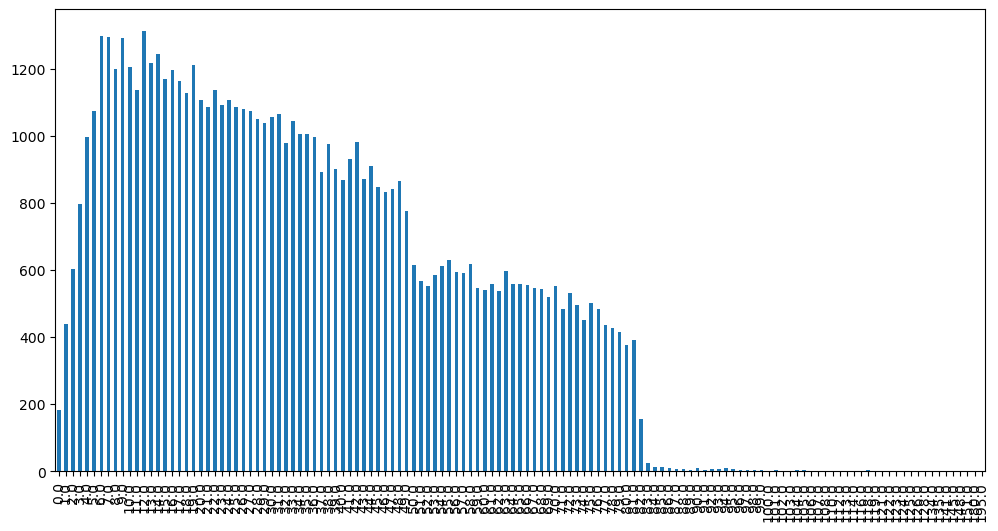

In [118]:
num.num_meses_desde_ult_retraso.value_counts().sort_index().plot.bar(figsize = (12,6))

There are zeros, but they seem few for a variable involving delays.

So let's think that nulls mean that there have been no delays.

And therefore impute by zeros.

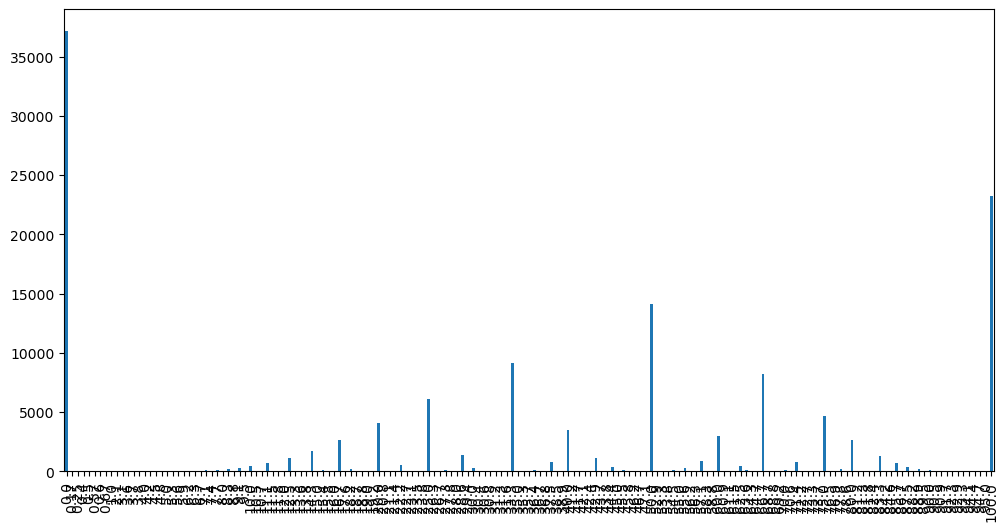

In [119]:
num.porc_tarjetas_75p.value_counts().sort_index().plot.bar(figsize = (12,6));

The majority category is zero.

We will impute for zero.

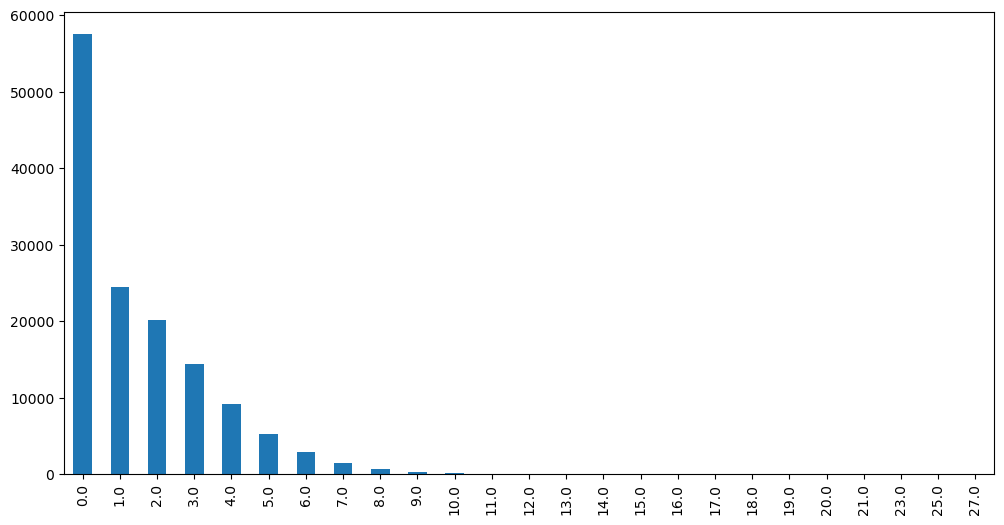

In [120]:
num.num_hipotecas.value_counts().sort_index().plot.bar(figsize = (12,6));

The majority category is zero.

We will impute for zero.

In [121]:
num.fillna(0,inplace=True)

In [124]:
num.num_derogatorios.isna().value_counts()

False    140000
Name: num_derogatorios, dtype: int64

### Outliers

#### By Standard Deviation

In [64]:
num_std = 4 #number of standar deviations

###### Function that returns the indices of the outliers

In [65]:
def outliers_std(variable, num_std = 4):
  
    variable = variable.dropna()
    #limits
    mean = np.mean(variable)
    sd = np.std(variable)
    treshold = sd * num_std
    lower_lim = mean - treshold
    upper_lim = mean + treshold
    #find the indices of those that are out of bounds.
    indices = [indice for indice,value in variable.items() if value < lower_lim or value > upper_lim]
    return(indices)

###### Function that counts the number of outliers

In [66]:
def count_outliers(df,variable, num_std = 4):
    outliers = outliers_std(df[variable], num_std)
    return(df.loc[outliers,variable].value_counts().sort_index())

###### To apply

In [67]:
var_outliers_dt = ['ingresos','principal','imp_cuota','imp_recuperado']

In [68]:
for variable in var_outliers_dt:
    print('\n' + variable + ':\n')
    print(count_outliers(num,variable,num_std))


ingresos:

384,000.00       2
385,000.00       5
386,000.00       3
388,000.00       1
389,000.00       1
                ..
4,560,077.00     1
7,000,000.00     1
7,845,315.00     1
9,550,000.00     1
10,999,200.00    1
Name: ingresos, Length: 160, dtype: int64

principal:

Series([], Name: principal, dtype: int64)

imp_cuota:

1,516.27    1
1,535.71    1
1,566.80    2
1,587.02    1
1,607.80    1
1,714.54    1
Name: imp_cuota, dtype: int64

imp_recuperado:

3,240.79     1
3,240.90     1
3,240.98     1
3,241.68     1
3,242.15     1
            ..
24,383.06    1
26,172.99    1
27,478.64    1
27,657.68    1
33,407.16    1
Name: imp_recuperado, Length: 1549, dtype: int64


Detail view.

In [69]:
num.ingresos.describe()

count      140,000.00
mean        78,035.13
std         76,412.80
min              0.00
25%         46,325.00
50%         65,000.00
75%         93,000.00
max     10,999,200.00
Name: ingresos, dtype: float64

Delete records with revenue greater than $300,000

###### Id rows to drop

In [70]:
to_drop = num.loc[num.ingresos > 300000].index.values
to_drop

array([ 88149047,  96702950,  70180828,  83678168, 128295694,  55380417,
        60525500,  70631462,  26329813, 114093587,    458760, 145133997,
       141509839,  74845067, 113905376,  91162705,  69967314, 134144676,
        33371205,  88195703, 114793732, 115048244,   9746316, 110905405,
        89794872,  39559363,  70592833,  77517938,  93092543,    489907,
       122689487,  57074442, 133401013,  79492925, 115085050,   3630153,
       141591423,  67427919,  92659557,  60963266, 138925364, 102523636,
       125219862,  88921166,  18895853, 109743090,    225812, 109322909,
       137347897,  53252537,  60873988,  12938159, 120217704, 104110402,
        65795964, 125737574, 132251779,   4044958, 134323203, 104319520,
       145242693,  79081285,    620850, 120150582,  74585468, 143147174,
       124877413, 122347658,   3643552,   1533286,  54248761, 145550896,
       108846002, 102574792,  10105445,  57206063, 135802748,  46742451,
       120205589,  46808563, 120605739,   1689366, 

###### Apply

In [71]:
cat = cat[~cat.index.isin(to_drop)]
num = num[~num.index.isin(to_drop)]

## SAVE DATASETS AFTER DATA QUALITY

In [72]:
path_work = path + '/02_Data/03_Work/' + 'work_result_quality.pickle'
path_cat = path + '/02_Data/03_Work/' + 'cat_result_quality.pickle'
path_num = path + '/02_Data/03_Work/' + 'num_result_quality.pickle'

In [73]:
df.to_pickle(path_work)
cat.to_pickle(path_cat)
num.to_pickle(path_num)